<a href="https://colab.research.google.com/github/Gustirobbani/Data-warehouse/blob/main/Sistem_keamanan_pintu_(Smart_Door).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Official Documentation of MMDetection Library:
https://github.com/open-mmlab/mmdetection \
https://mmcv.readthedocs.io/en/latest/ \
https://mmdetection.readthedocs.io/en/latest/

# Installing Libraries

In [ ]:
# Checking CUDA version.
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# Checking torch version.
import torch
print(torch.__version__)

1.10.0+cu111


In [ ]:
# Installing MMCV.
# Do not compile MMCV locally! It takes too much time.
# Instead, check how to install ready-to-use MMCV in https://mmcv.readthedocs.io/en/latest/get_started/installation.html .
# MMCV version can be checked in https://github.com/open-mmlab/mmcv/tags .
! pip install mmcv-full==1.4.5 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 68.5 MB 148 kB/s 
     |████████████████████████████████| 190 kB 4.8 MB/s 


In [ ]:
# Installing MMDetection library.
! pip install mmdet

     |████████████████████████████████| 1.3 MB 5.3 MB/s 


In [ ]:
# Downloading MMDetection github.
# We will use configuration file and training script from this repository.
! git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 23494, done.
remote: Total 23494 (delta 0), reused 0 (delta 0), pack-reused 23494
Receiving objects: 100% (23494/23494), 35.28 MiB | 24.79 MiB/s, done.
Resolving deltas: 100% (16418/16418), done.


# Importing Libraries

In [ ]:
import os
import time
import mmcv
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

from mmcv import Config
from mmdet.apis import init_detector, inference_detector

# Define available device.
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.device(device)

device(type='cuda')

# Downloading Dataset

In [ ]:
# Download aquarium-object-detection-dataset.zip.
os.system("gdown https://drive.google.com/uc?id=1W7kkk44Avkhkbb_TaXEaNDNAlplJeNvm")

256

In [ ]:
# Jika cara download di atas tidak berhasil karena diblokir oleh Google,
# download dataset-nya di https://drive.google.com/uc?id=1W7kkk44Avkhkbb_TaXEaNDNAlplJeNvm
# lalu upload ke Google Drive pribadi,
# lalu akses dari Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ganti filepath berikut ini sesuai masing-masing.
filepath = "drive/MyDrive/Poltek\ HarBer/aquarium-object-detection-dataset.zip"

! cp {filepath} ./

In [ ]:
# Extracting aquarium-object-detection-dataset.zip.
! unzip aquarium-object-detection-dataset.zip -d my-dataset
! rm aquarium-object-detection-dataset.zip

Archive:  aquarium-object-detection-dataset.zip
  inflating: my-dataset/README.dataset.txt  
  inflating: my-dataset/README.roboflow.txt  
  inflating: my-dataset/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg  
  inflating: my-dataset/test/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg  
  inflating: my-dataset/test/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg  
  inflating: my-dataset/test/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg  
  inflating: my-dataset/test/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg  
  inflating: my-dataset/test/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg  
  inflating: my-dataset/test/IMG_2379_jpeg_jpg.rf.7dc3160c937072d26d4624c6c48e904d.jpg  
  inflating: my-dataset/test/IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg  
  inflating: my-dataset/test/IMG_2387_jpeg_jpg.rf.09b38bacfab0922a3a6b66480f01b719.jpg  
  inflating: my-dataset/test/IMG_2395_jpeg_jpg.rf.9f1503ad3b

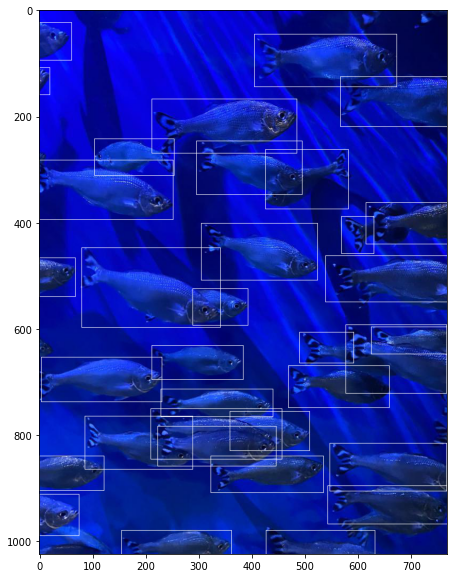

,filename,width,height,class,xmin,ymin,xmax,ymax
2598,IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52b...,768,1024,fish,80,447,341,597
2599,IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52b...,768,1024,fish,577,592,767,721
2600,IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52b...,768,1024,fish,426,262,582,374
2601,IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52b...,768,1024,fish,0,282,252,394
2602,IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52b...,768,1024,fish,305,401,524,508
2603,IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52b...,768,1024,fish,212,167,485,269
2604,IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52b...,768,1024,fish,296,246,495,347
2605,IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52b...,768,1024,fish,86,764,289,864
2606,IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52b...,768,1024,fish,405,45,673,144
2607,IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52b...,768,1024,fish,210,750,457,845


In [ ]:
# Show some examples.
filename = "IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52bb325a0c.jpg"
img = Image.open(f"my-dataset/train/{filename}")
draw = ImageDraw.Draw(img)

df = pd.read_csv("my-dataset/train/_annotations.csv")
rows = df.loc[df['filename'] == filename]
for index, row in rows.iterrows():
  draw.rectangle([row["xmin"], row["ymin"], row["xmax"], row["ymax"]])

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

rows

# Preprocessing

In [ ]:
for type in ["train", "valid", "test"]:
  CLASSES = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
  categories = []; images = []; annotations = [];
  folder = f"my-dataset/{type}/"
  df = pd.read_csv(f"{folder}/_annotations.csv")

  for index, clazz in enumerate(CLASSES):
    categories.append({"id":index, "name":clazz})

  for filename in os.listdir(folder):
    if filename.endswith(".csv"):
      continue
    
    imgId = time.time_ns()
    imgSize = Image.open(f"{folder}/{filename}").size
    images.append(dict(
      id = imgId,
      file_name = filename,
      height = imgSize[0],
      width = imgSize[1],
    ))

    rows = df.loc[df['filename'] == filename]
    for index, row in rows.iterrows():
      xMin = row["xmin"]
      yMin = row["ymin"]
      width = row["xmax"] - xMin
      height = row["ymax"] - yMin
      annotations.append(dict(
        category_id = CLASSES.index(row["class"]),
        image_id = imgId,
        id = time.time_ns(),
        bbox = [xMin, yMin, width, height],
        area = width * height,
        iscrowd = 0,
      ))

  cocoFormatDict = dict(
    categories = categories,
    images = images,
    annotations = annotations
  )

  mmcv.dump(cocoFormatDict, f"my-dataset/{type}_annot.json")

# Training YOLOv3 Model

## Downloading Pretrained Model

In [ ]:
# Downloading YOLOv3 pretrained model from https://github.com/open-mmlab/mmdetection/blob/master/configs/yolo/README.md#results-and-models .
! mkdir checkpoints
! wget -c https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_320_273e_coco/yolov3_d53_320_273e_coco-421362b6.pth \
      -O checkpoints/yolov3_d53_320_273e_coco-421362b6.pth

--2022-02-04 00:55:26--  https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_320_273e_coco/yolov3_d53_320_273e_coco-421362b6.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248091419 (237M) [application/octet-stream]
Saving to: ‘checkpoints/yolov3_d53_320_273e_coco-421362b6.pth’

checkpoints/yolov3_ 100%[===================>] 236.60M  7.60MB/s    in 28s     

2022-02-04 00:55:55 (8.33 MB/s) - ‘checkpoints/yolov3_d53_320_273e_coco-421362b6.pth’ saved [248091419/248091419]



## Printing the Available Configuration

In [ ]:
cfg = Config.fromfile("mmdetection/configs/yolo/yolov3_d53_320_273e_coco.py")
print(cfg.pretty_text)

checkpoint_config = dict(interval=1)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='Darknet',
        depth=53,
        out_indices=(3, 4, 5),
        init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://darknet53')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=80,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],
        anchor_generator=dict(
            type='YOLOAnchorGenerator',
            base_sizes=[[(116, 90), (156, 198), (373, 326)],
                        [(30, 61), (62, 45), (59, 119)],
                        [(10, 13), (16, 30), (33,

## Modifying the Configuration

In [ ]:
def createYOLOv3ConfigFile(classes):
  cfg = Config.fromfile("mmdetection/configs/yolo/yolov3_d53_320_273e_coco.py")

  cfg.load_from = "checkpoints/yolov3_d53_320_273e_coco-421362b6.pth" # Transfer learning from pretrained model.
  cfg.model.bbox_head.num_classes = len(classes) # Number of classes.
  cfg.data.samples_per_gpu = 16 # Batch size.
  cfg.data.workers_per_gpu = 2
  cfg.optimizer = dict(type='AdamW', lr=1e-3, weight_decay=0.1)
  cfg.runner.max_epochs = 10

  cfg.data.train.img_prefix = "my-dataset/train/" # Training data folder
  cfg.data.train.ann_file = "my-dataset/train_annot.json" # Annotation file of training data.
  cfg.data.train.classes = classes

  cfg.data.val.img_prefix = "my-dataset/valid/" # Validation data folder
  cfg.data.val.ann_file = "my-dataset/valid_annot.json" # Annotation file of validation data.
  cfg.data.val.classes = classes

  cfg.data.test.img_prefix = "my-dataset/test/" # Testing data folder
  cfg.data.test.ann_file = "my-dataset/test_annot.json" # Annotation file of testing data.
  cfg.data.test.classes = classes

  cfg.dump("my_yolov3_d53_320_273e_coco.py")

## Fine-Tuning the Model

In [ ]:
createYOLOv3ConfigFile(CLASSES)

! python mmdetection/tools/train.py my_yolov3_d53_320_273e_coco.py

fatal: not a git repository (or any of the parent directories): .git
2022-02-04 00:56:05,924 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.12 (default, Jan 15 2022, 18:48:18) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1.TC455_06.29190527_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.10.0+cu111
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=comp

## Testing the Model

In [ ]:
createYOLOv3ConfigFile(CLASSES)

! python mmdetection/tools/test.py my_yolov3_d53_320_273e_coco.py "work_dirs/my_yolov3_d53_320_273e_coco/epoch_10.pth" --eval bbox

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
load checkpoint from local path: work_dirs/my_yolov3_d53_320_273e_coco/epoch_10.pth
[                                                  ] 0/63, elapsed: 0s, ETA:/usr/local/lib/python3.7/dist-packages/mmdet/models/dense_heads/yolo_head.py:270: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  scale_factors).unsqueeze(1)
[>>] 63/63, 33.9 task/s, elapsed: 2s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.11s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.87s).
Accumulating evaluation results...
DONE (t=0.13s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.100
 Average Precision  (AP)

## Inferencing Using the Model

In [ ]:
configFile = "my_yolov3_d53_320_273e_coco.py"
checkpointFile = "work_dirs/my_yolov3_d53_320_273e_coco/epoch_9.pth"

model = init_detector(configFile, checkpointFile, device='cuda:0')

load checkpoint from local path: work_dirs/my_yolov3_d53_320_273e_coco/epoch_9.pth


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


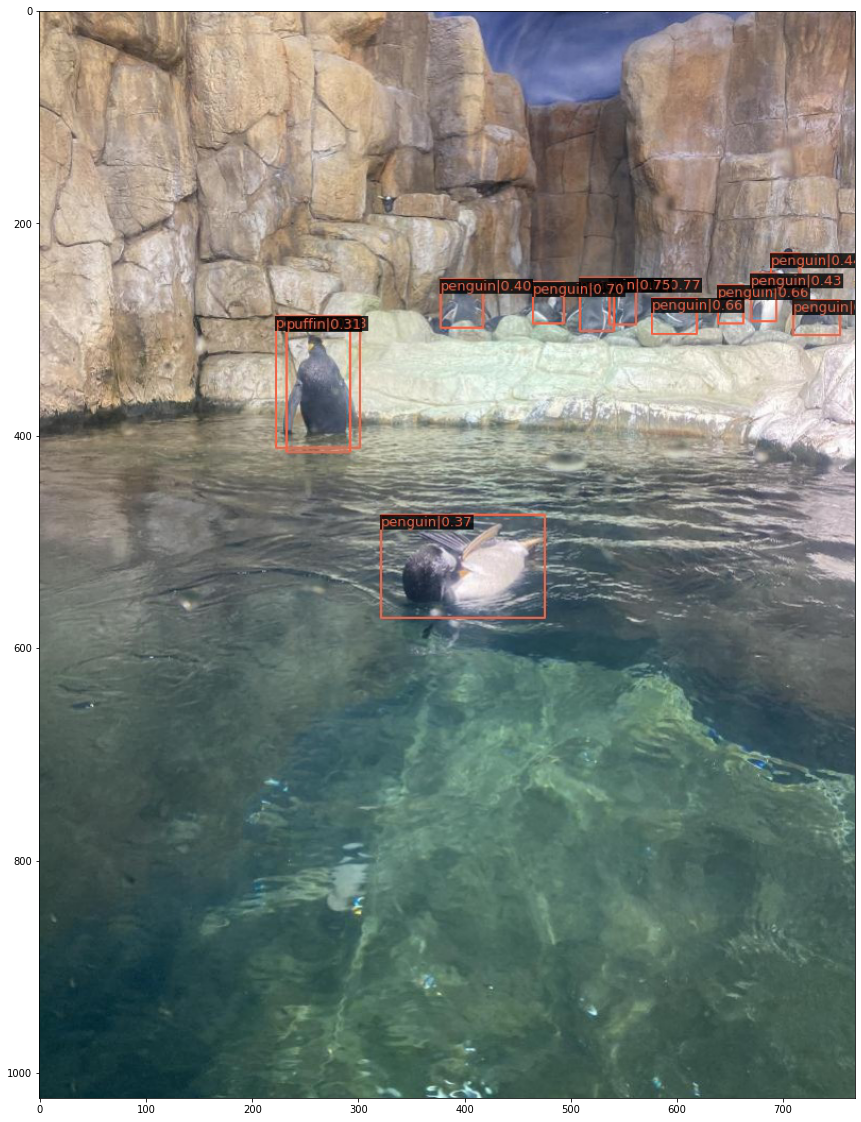

In [ ]:
imageFile = "my-dataset/train/IMG_2320_jpeg_jpg.rf.4ba216e1f004fd1182ca0dfb53ccce19.jpg"
result = inference_detector(model, imageFile)
model.show_result(imageFile, result, out_file="prediction.jpg")

img = Image.open("prediction.jpg")
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

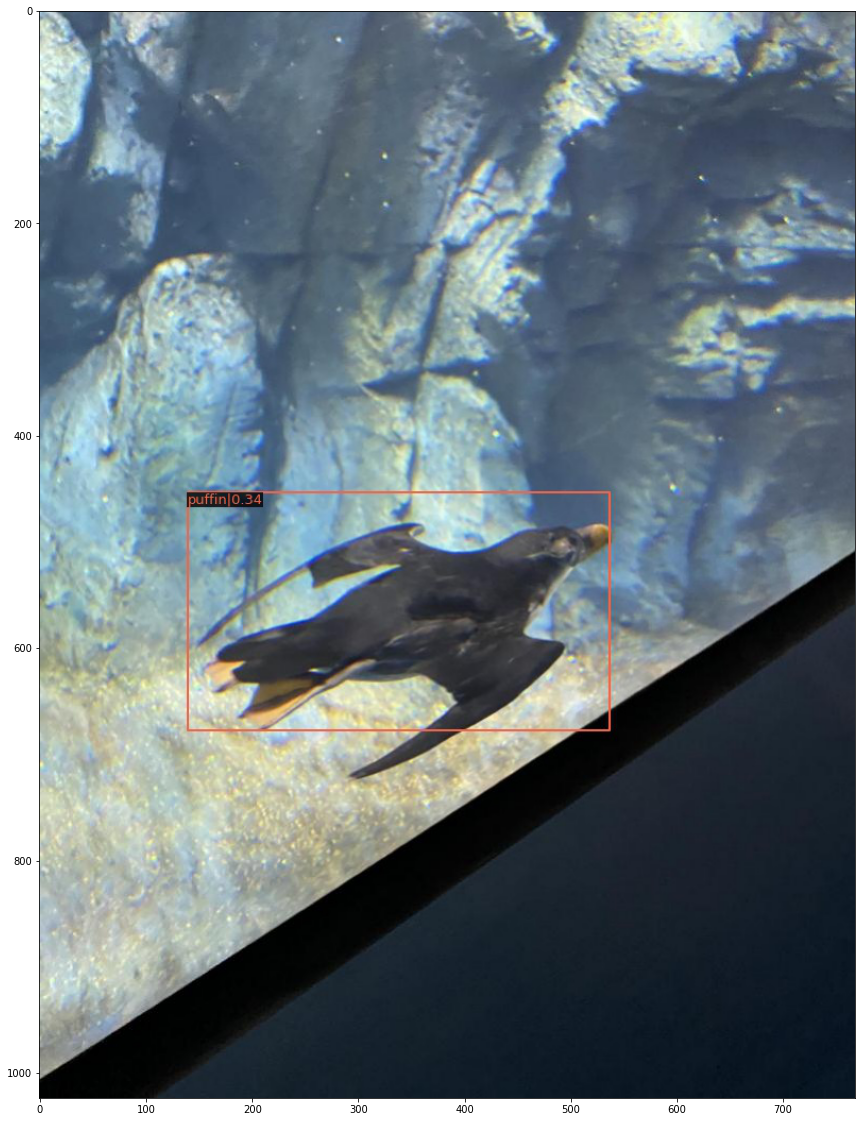

In [ ]:
imageFile = "my-dataset/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg"
result = inference_detector(model, imageFile)
model.show_result(imageFile, result, out_file="prediction.jpg")

img = Image.open("prediction.jpg")
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()